In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import os
import itertools
%matplotlib inline

In [ ]:
Crema_Path='/content/drive/MyDrive/Speech Emotion Recognition/Crema'
Ravdess_Path='/content/drive/MyDrive/Speech Emotion Recognition/Ravdess/audio_speech_actors_01-24'
Savee_Path='/content/drive/MyDrive/Speech Emotion Recognition/Savee'
Tess_Path='/content/drive/MyDrive/Speech Emotion Recognition/Tess'

In [ ]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                                          File_Path
0  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
1    angry  /content/drive/MyDrive/Speech Emotion Recognit...
2     fear  /content/drive/MyDrive/Speech Emotion Recognit...
3      sad  /content/drive/MyDrive/Speech Emotion Recognit...
4  neutral  /content/drive/MyDrive/Speech Emotion Recognit...

In [ ]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0     sad  /content/drive/MyDrive/Speech Emotion Recognit...
1   happy  /content/drive/MyDrive/Speech Emotion Recognit...
2   angry  /content/drive/MyDrive/Speech Emotion Recognit...
3   angry  /content/drive/MyDrive/Speech Emotion Recognit...
4   happy  /content/drive/MyDrive/Speech Emotion Recognit...

In [ ]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                                          File_Path
0    angry  /content/drive/MyDrive/Speech Emotion Recognit...
1    angry  /content/drive/MyDrive/Speech Emotion Recognit...
2  disgust  /content/drive/MyDrive/Speech Emotion Recognit...
3  disgust  /content/drive/MyDrive/Speech Emotion Recognit...
4    angry  /content/drive/MyDrive/Speech Emotion Recognit...

In [ ]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                          File_Path
0  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
1  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
2  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
3  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
4  neutral  /content/drive/MyDrive/Speech Emotion Recognit...

In [ ]:
print(Crema_df['Emotion'].unique())
print(Ravdess_df['Emotion'].unique())
print(Savee_df['Emotion'].unique())
print(Tess_df['Emotion'].unique())

['neutral' 'angry' 'fear' 'sad' 'disgust' 'happy']
['sad' 'happy' 'angry' 'neutral' 'fear' 'disgust' 'surprise']
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
['neutral' 'happy' 'surprise' 'disgust' 'angry' 'fear' 'sad']


In [ ]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.head(10)

Emotion                                          File_Path
0  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
1    angry  /content/drive/MyDrive/Speech Emotion Recognit...
2     fear  /content/drive/MyDrive/Speech Emotion Recognit...
3      sad  /content/drive/MyDrive/Speech Emotion Recognit...
4  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
5  disgust  /content/drive/MyDrive/Speech Emotion Recognit...
6    happy  /content/drive/MyDrive/Speech Emotion Recognit...
7  neutral  /content/drive/MyDrive/Speech Emotion Recognit...
8     fear  /content/drive/MyDrive/Speech Emotion Recognit...
9  neutral  /content/drive/MyDrive/Speech Emotion Recognit...

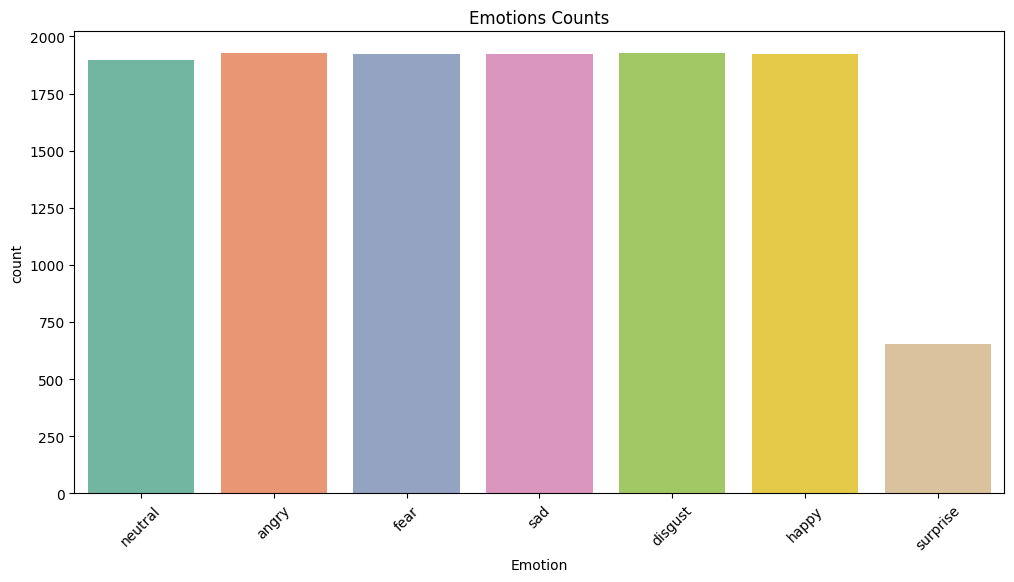

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

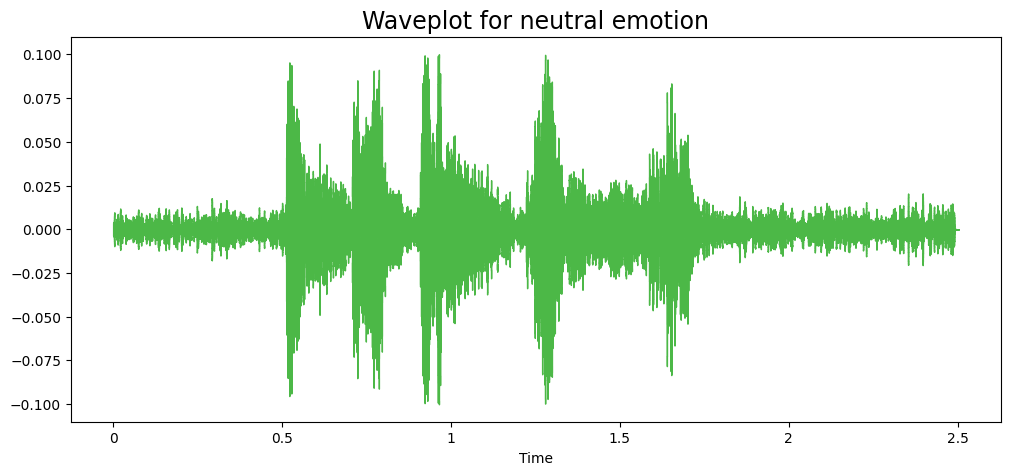

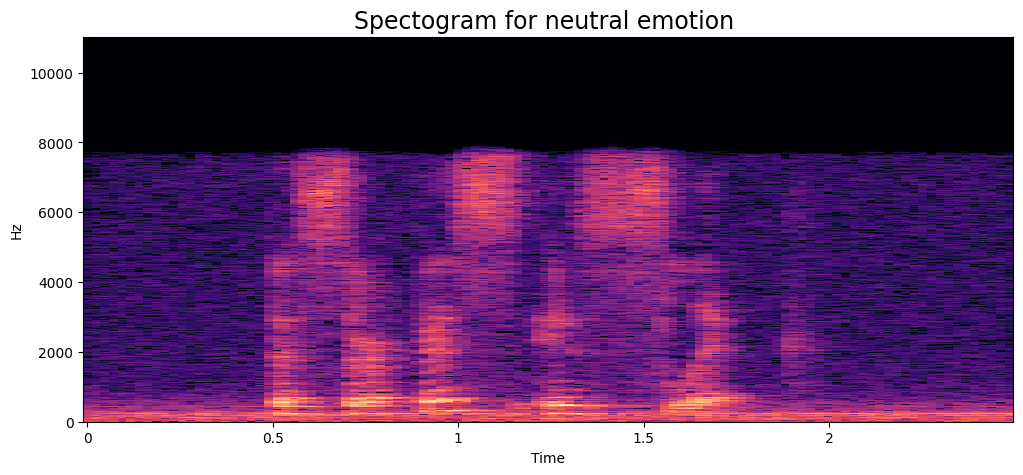

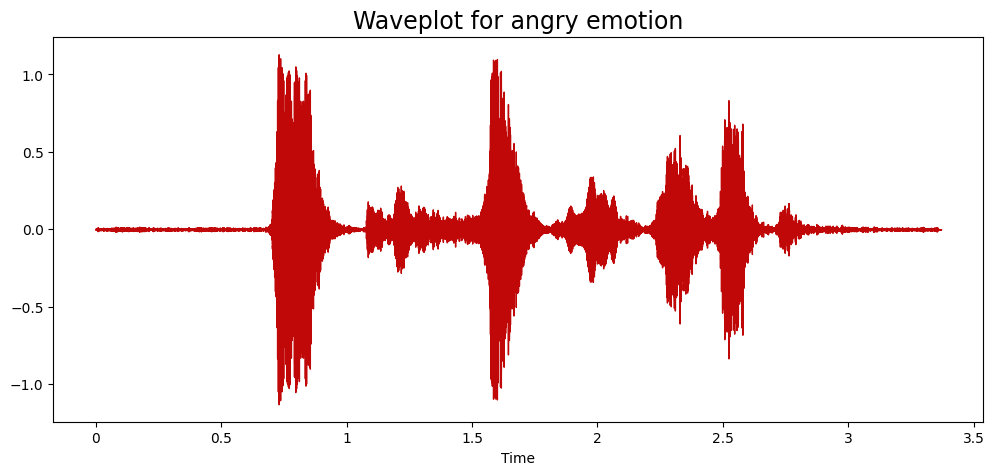

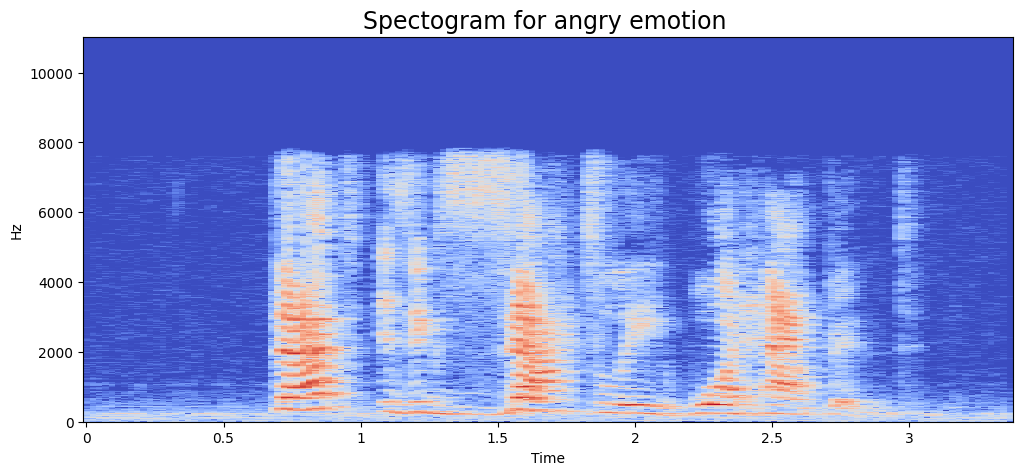

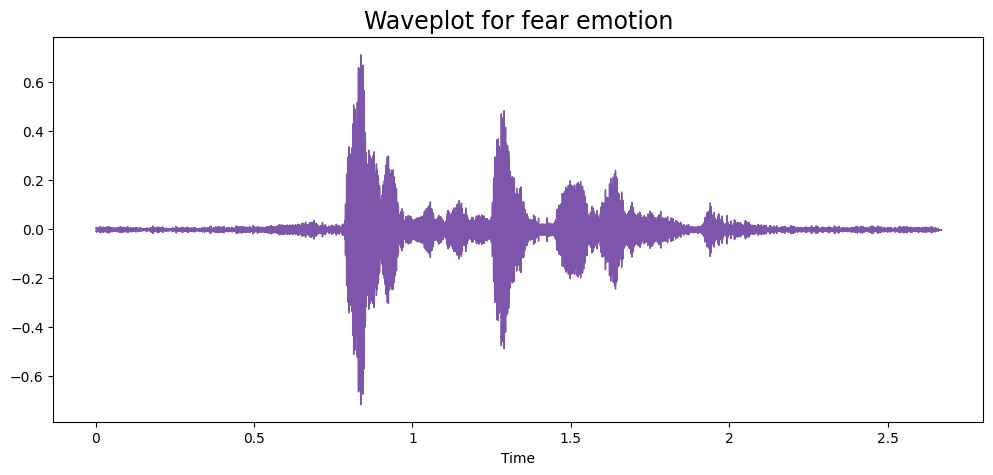

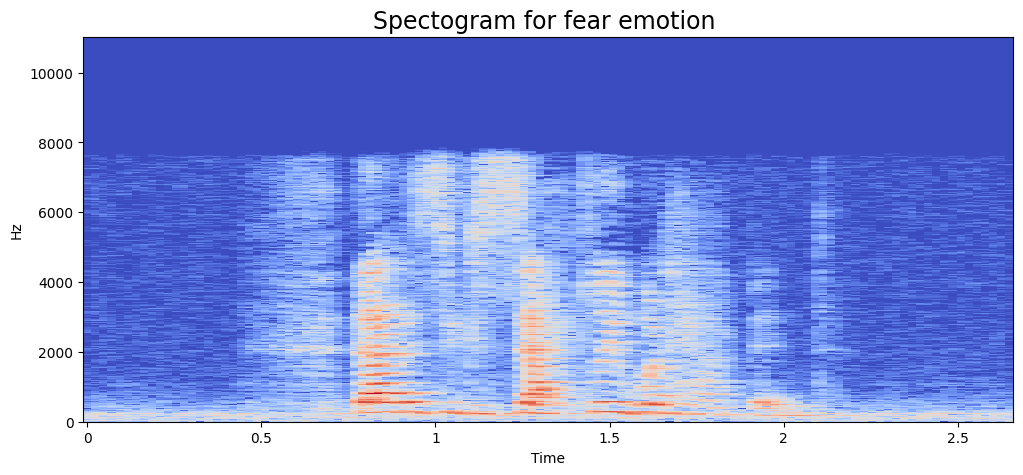

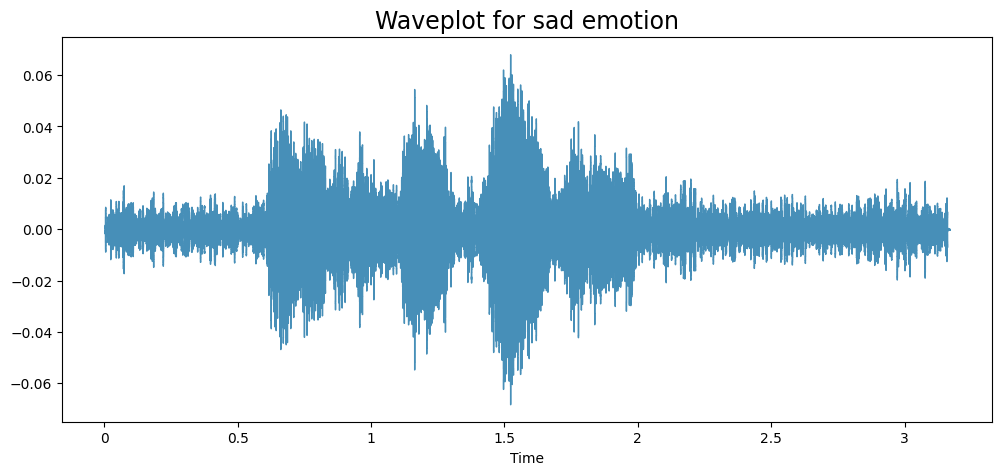

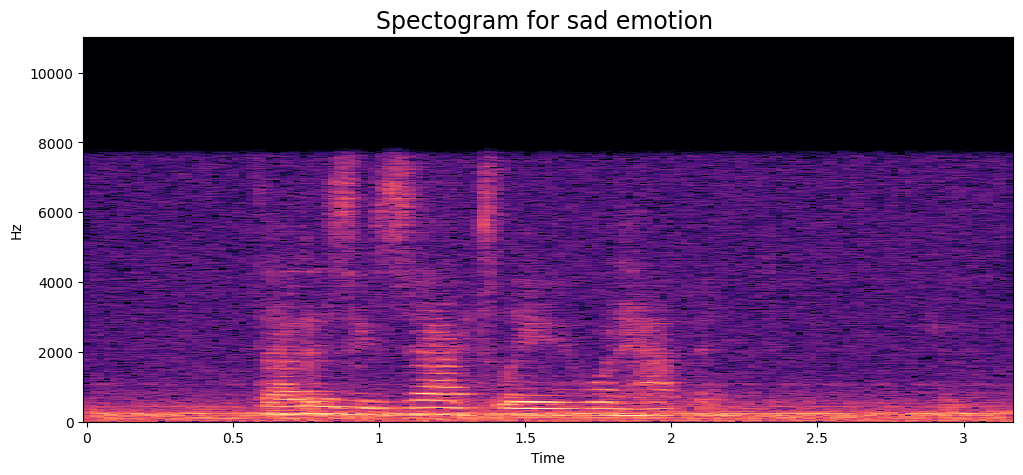

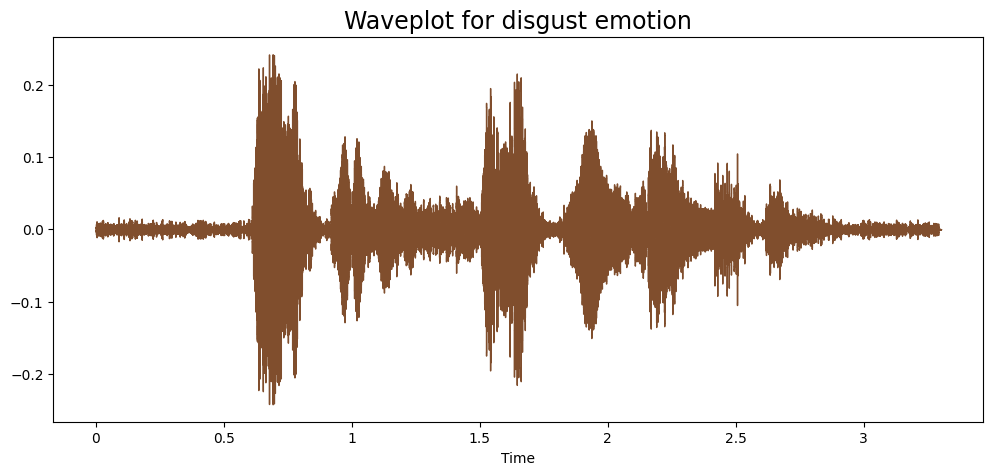

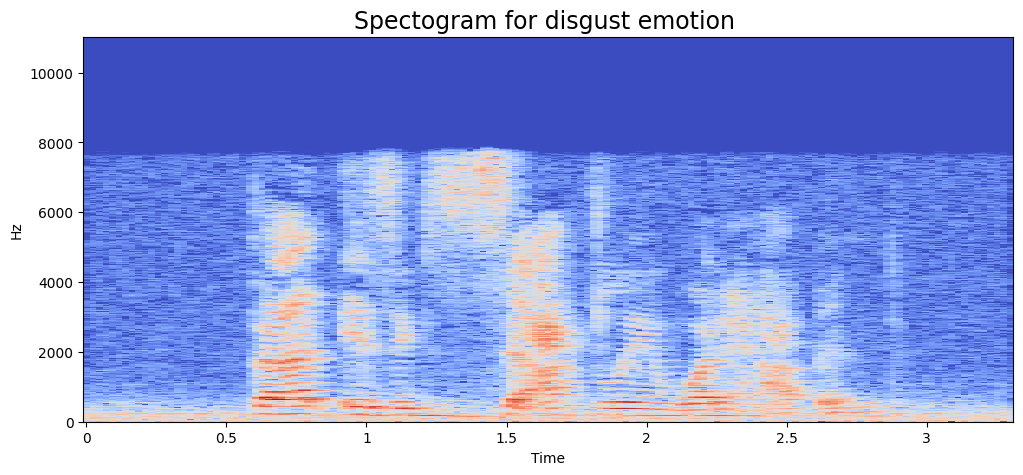

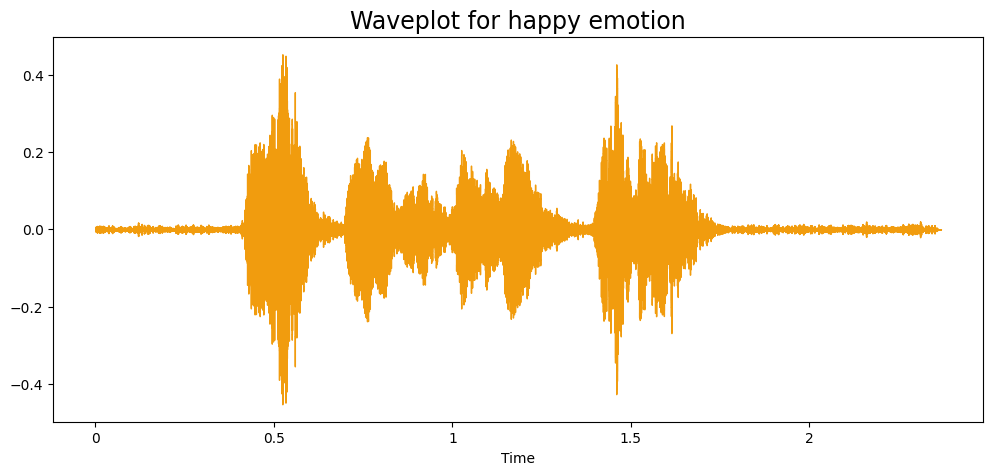

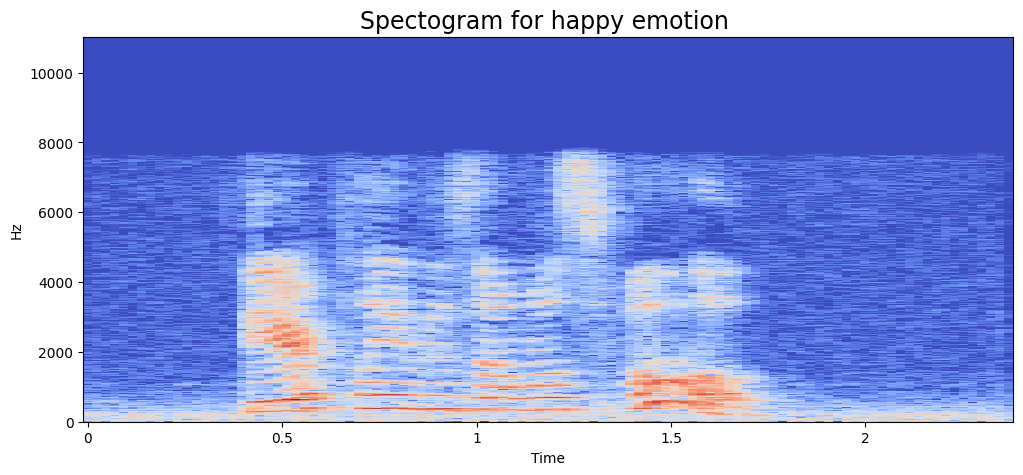

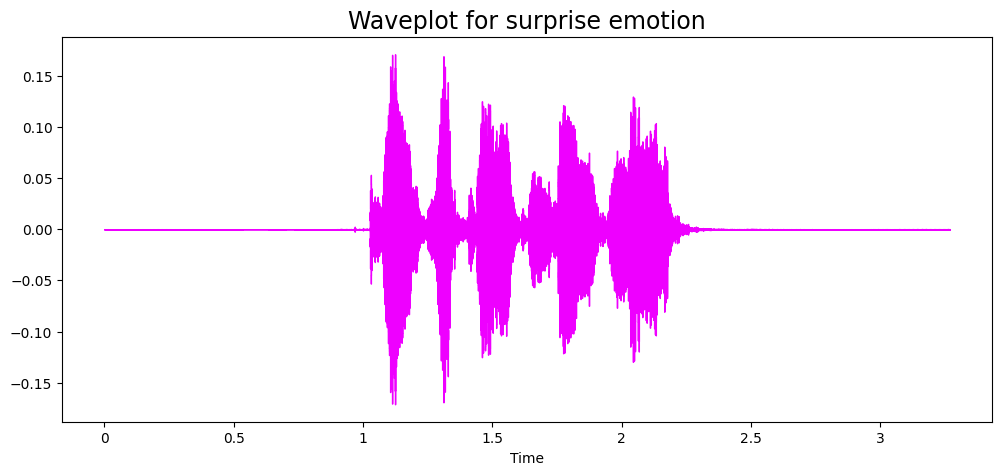

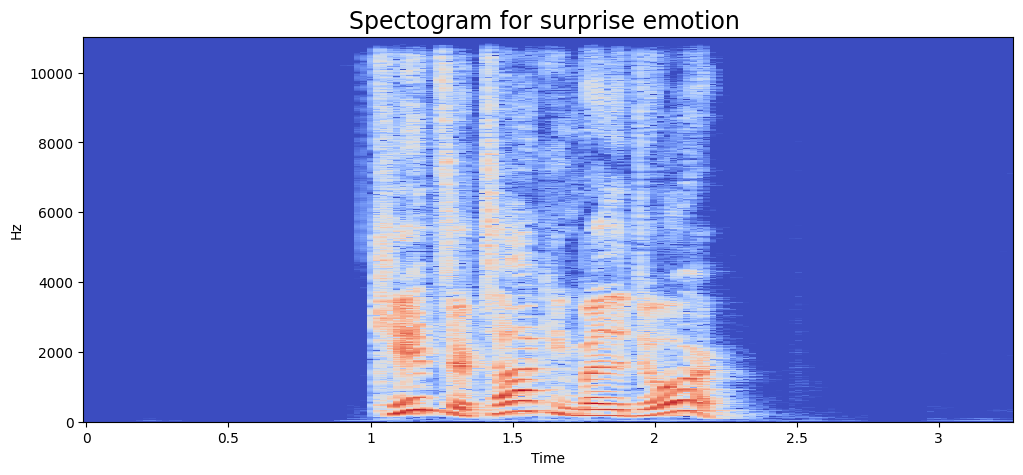

In [ ]:
emotion_names=main_df['Emotion'].unique()
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'Waveplot for {emotion} emotion',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'Spectogram for {emotion} emotion ',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [ ]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [ ]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [ ]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [ ]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [ ]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [ ]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [ ]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample



In [ ]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
def shifting(data,rate=1000):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)


data,sr=librosa.load(audio_path[6])

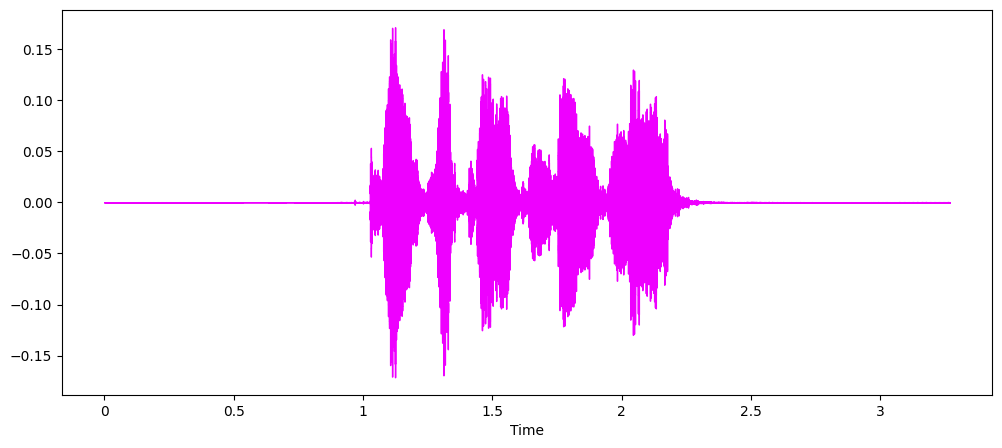

In [ ]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,color='#EE00FF')
IPython.display.Audio(audio_path[6])

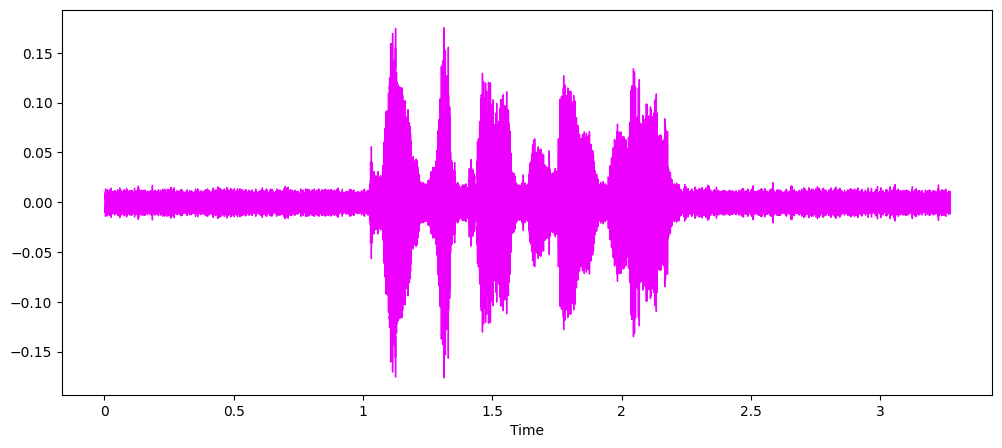

In [ ]:
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)

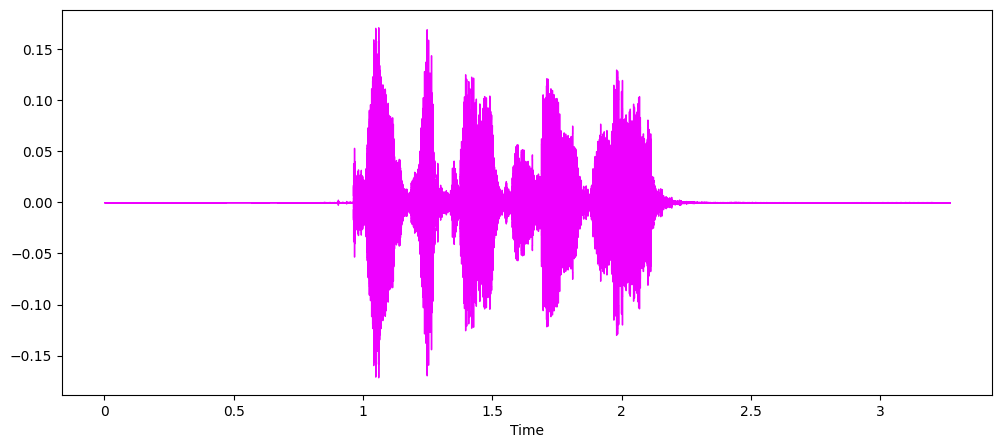

In [ ]:
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)

In [ ]:
def feat_ext(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    return mfcc
def get_feat(path):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = add_noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    return result

In [ ]:
X, Y = [], []
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    feature = get_feat(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed


In [ ]:
processed_data_path='./processed_data.csv'

In [ ]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

0           1          2          3          4          5  \
0 -391.403351  137.468552  -0.414448  46.903648 -19.687500  22.560957   
1 -345.479659   90.041776  27.968895  19.470844   3.412984   5.322951   
2 -260.116669  101.725418  -8.232370  53.212696 -16.729317   1.681336   
3 -134.438214   34.191652   5.299526  14.783011  -0.603575 -11.948845   
4 -286.692413   79.488998 -14.619031  35.155041 -17.074408   5.671797   
5 -119.668678   12.257395  -3.852516   0.249156  -6.817259  -6.900795   
6 -431.416016  136.899734   6.819000  56.906460 -13.570349  25.321672   
7 -348.399724   67.214222  35.289490  23.301117  11.206627   5.749070   
8 -403.476807  117.208290   9.050887  64.802452 -15.443962  28.780931   
9 -338.245816   60.644057  36.250649  31.390779  10.369939   8.178276   

           6          7          8          9  ...         11         12  \
0 -19.923315  13.531667 -10.622371   7.332145  ...  -0.782421   5.725660   
1  -4.950623   2.632783  -3.202329   3.020919  ...   1.555200   1.298867   
2 -19.263235  11.269491 -15.907349  -0.869268  ...  -8.882347   8.271458   
3  -4.606685  -1.418605  -8.307941  -4.064694  ...  -3.851042   1.673666   
4 -19.115667  11.186099  -7.328322  15.234522  ...  12.135159  17.927982   
5  -8.306129  -1.098923  -0.571362   7.466482  ...   7.996680   7.422049   
6 -16.363411  16.666210  -6.901478   5.795194  ...  -3.548982   2.956443   
7   1.636848   4.058463   2.114988   1.920073  ...  -1.248881  -1.654126   
8 -28.422277  17.629004 -12.544510   6.004076  ...  -1.783918  10.491031   
9  -9.181816   4.501873  -3.291028   1.213000  ...   0.730340   4.907334   

          13        14         15        16         17        18        19  \
0 -10.968555  7.913955 -12.269455  3.506324  -9.307920 -2.512389 -0.656165   
1  -4.112947  0.983901  -6.222246 -2.679997  -4.610880 -4.792405 -0.103272   
2  -4.586426  6.172502  -6.609151  3.603674  -8.287832 -2.134919 -6.442697   
3  -0.217938 -0.105471  -0.554855 -1.017461  -3.078739 -2.974209 -3.510938   
4 -14.108038 -4.627678 -13.133171  0.888783 -10.773143 -2.139101  0.237575   
5  -6.447746 -6.798626  -4.696625 -1.686059  -3.172601 -1.810017  2.373942   
6  -9.686718  4.297136 -12.607700  4.486144  -9.574160  0.295607 -2.267739   
7  -3.140323 -3.778536  -4.846255 -2.817002  -3.678466 -2.629286 -1.012871   
8  -9.430191  8.939863 -14.448385  2.836974 -12.945433 -3.234682 -1.928419   
9  -3.382369  0.756040  -6.034873 -3.526809  -6.549205 -7.019977 -1.908232   

   Emotion  
0  neutral  
1  neutral  
2    angry  
3    angry  
4     fear  
5     fear  
6      sad  
7      sad  
8  neutral  
9  neutral  

[10 rows x 21 columns]

In [ ]:
df=pd.read_csv(processed_data_path)
df

0           1          2          3          4          5  \
0     -391.403351  137.468552  -0.414448  46.903648 -19.687500  22.560957   
1     -345.479659   90.041776  27.968895  19.470844   3.412984   5.322951   
2     -260.116669  101.725418  -8.232370  53.212696 -16.729317   1.681336   
3     -134.438214   34.191652   5.299526  14.783011  -0.603575 -11.948845   
4     -286.692413   79.488998 -14.619031  35.155041 -17.074408   5.671797   
...           ...         ...        ...        ...        ...        ...   
24339 -417.373488   62.715318  11.660479 -12.940238  -1.755328   4.043133   
24340 -436.201172  101.513130  17.484726 -27.062849 -12.931480  -1.523291   
24341 -316.739522   43.020382  10.084626  -8.578273  -6.482071  -2.874447   
24342 -427.089355   56.516975   8.533942 -22.255447  -3.438979   1.293175   
24343 -348.179372   37.602653   5.471758 -12.234917  -4.117400  -0.399496   

               6          7          8          9  ...         11         12  \
0     -19.923315  13.531667 -10.622371   7.332145  ...  -0.782421   5.725660   
1      -4.950623   2.632783  -3.202329   3.020919  ...   1.555200   1.298867   
2     -19.263235  11.269491 -15.907349  -0.869268  ...  -8.882347   8.271458   
3      -4.606685  -1.418605  -8.307941  -4.064694  ...  -3.851042   1.673666   
4     -19.115667  11.186099  -7.328322  15.234522  ...  12.135159  17.927982   
...          ...        ...        ...        ...  ...        ...        ...   
24339  -2.357654  -4.580136 -11.421565  -7.327830  ...  -5.755724  -2.557800   
24340  -9.172688  -3.271204 -19.958412   4.613488  ...  -7.444180  -8.544152   
24341  -4.612670  -5.151991  -7.339988  -2.996771  ...  -9.730485  -8.128902   
24342 -10.227915  -0.655954 -15.578082  -4.263252  ...  -0.926421  -7.122791   
24343  -4.602613  -3.464503  -8.791622  -7.318861  ...  -4.792079  -5.160651   

              13        14         15        16         17        18  \
0     -10.968555  7.913955 -12.269455  3.506324  -9.307920 -2.512389   
1      -4.112947  0.983901  -6.222246 -2.679997  -4.610880 -4.792405   
2      -4.586426  6.172502  -6.609151  3.603674  -8.287832 -2.134919   
3      -0.217938 -0.105471  -0.554855 -1.017461  -3.078739 -2.974209   
4     -14.108038 -4.627678 -13.133171  0.888783 -10.773143 -2.139101   
...          ...       ...        ...       ...        ...       ...   
24339  -4.434201 -2.623509  -0.417043 -4.221138  -0.326319 -1.449025   
24340  -6.633316 -8.114303   1.981354 -7.341032   0.489043 -2.228029   
24341  -6.746726 -4.905271  -4.387653 -4.269955  -3.814548 -3.639753   
24342   3.619541 -6.553974  -0.955429 -3.838796   1.418757  4.062859   
24343  -2.433993 -4.064286  -3.446987 -4.143277  -1.853633  1.982145   

             19  Emotion  
0     -0.656165  neutral  
1     -0.103272  neutral  
2     -6.442697    angry  
3     -3.510938    angry  
4      0.237575     fear  
...         ...      ...  
24339 -3.447763     fear  
24340 -9.199964     fear  
24341 -5.098283     fear  
24342  9.408432     fear  
24343  7.697570     fear  

[24344 rows x 21 columns]

In [ ]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
Emotion    False
dtype: bool


(24344, 21)

In [ ]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [ ]:
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((17527, 20, 1), (4869, 20, 1), (1948, 20, 1))

In [ ]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
EPOCH=50
BATCH_SIZE=64

In [ ]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 512)           3072      
                                                                 
 batch_normalization (BatchN  (None, 20, 512)          2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 512)           1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 10, 512)          2048      
 hNormalization)                                                 
                                                        

In [ ]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/50
274/274 [==============================] - ETA: 0s - loss: 1.5963 - accuracy: 0.3857

274/274 [==============================] - 125s 423ms/step - loss: 1.5963 - accuracy: 0.3857 - val_loss: 2.0409 - val_accuracy: 0.1632 - lr: 0.0010
Epoch 2/50
274/274 [==============================] - ETA: 0s - loss: 1.3502 - accuracy: 0.4680

274/274 [==============================] - 117s 427ms/step - loss: 1.3502 - accuracy: 0.4680 - val_loss: 1.7743 - val_accuracy: 0.3255 - lr: 0.0010
Epoch 3/50
274/274 [==============================] - ETA: 0s - loss: 1.2957 - accuracy: 0.4819

274/274 [==============================] - 114s 415ms/step - loss: 1.2957 - accuracy: 0.4819 - val_loss: 1.2847 - val_accuracy: 0.4718 - lr: 0.0010
Epoch 4/50
274/274 [==============================] - ETA: 0s - loss: 1.2490 - accuracy: 0.5011

274/274 [==============================] - 113s 410ms/step - loss: 1.2490 - accuracy: 0.5011 - val_loss: 1.2899 - val_accuracy: 0.4774 - lr: 0.0010
Epoch 5/50
274/274 [==============================] - ETA: 0s - loss: 1.2201 - accuracy: 0.5093

274/274 [==============================] - 114s 417ms/step - loss: 1.2201 - accuracy: 0.5093 - val_loss: 1.3239 - val_accuracy: 0.4682 - lr: 0.0010
Epoch 6/50
274/274 [==============================] - ETA: 0s - loss: 1.1824 - accuracy: 0.5272

274/274 [==============================] - 112s 408ms/step - loss: 1.1824 - accuracy: 0.5272 - val_loss: 1.2379 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 7/50
274/274 [==============================] - ETA: 0s - loss: 1.1634 - accuracy: 0.5361

274/274 [==============================] - 112s 408ms/step - loss: 1.1634 - accuracy: 0.5361 - val_loss: 1.2099 - val_accuracy: 0.5123 - lr: 0.0010
Epoch 8/50
274/274 [==============================] - ETA: 0s - loss: 1.1377 - accuracy: 0.5478

274/274 [==============================] - 111s 407ms/step - loss: 1.1377 - accuracy: 0.5478 - val_loss: 1.2397 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 9/50
274/274 [==============================] - ETA: 0s - loss: 1.1300 - accuracy: 0.5469

274/274 [==============================] - 112s 410ms/step - loss: 1.1300 - accuracy: 0.5469 - val_loss: 1.2802 - val_accuracy: 0.4851 - lr: 0.0010
Epoch 10/50
274/274 [==============================] - ETA: 0s - loss: 1.0879 - accuracy: 0.5644

274/274 [==============================] - 112s 408ms/step - loss: 1.0879 - accuracy: 0.5644 - val_loss: 1.2472 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 11/50
274/274 [==============================] - ETA: 0s - loss: 1.0795 - accuracy: 0.5690

274/274 [==============================] - 113s 411ms/step - loss: 1.0795 - accuracy: 0.5690 - val_loss: 1.1955 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 12/50
274/274 [==============================] - ETA: 0s - loss: 1.0553 - accuracy: 0.5820

274/274 [==============================] - 113s 411ms/step - loss: 1.0553 - accuracy: 0.5820 - val_loss: 1.2639 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 13/50
274/274 [==============================] - ETA: 0s - loss: 1.0292 - accuracy: 0.5969

274/274 [==============================] - 110s 402ms/step - loss: 1.0292 - accuracy: 0.5969 - val_loss: 1.1905 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 14/50
274/274 [==============================] - ETA: 0s - loss: 1.0058 - accuracy: 0.6000

274/274 [==============================] - 113s 412ms/step - loss: 1.0058 - accuracy: 0.6000 - val_loss: 1.1753 - val_accuracy: 0.5431 - lr: 0.0010
Epoch 15/50
274/274 [==============================] - ETA: 0s - loss: 0.9649 - accuracy: 0.6209

274/274 [==============================] - 110s 401ms/step - loss: 0.9649 - accuracy: 0.6209 - val_loss: 1.2005 - val_accuracy: 0.5441 - lr: 0.0010
Epoch 16/50
274/274 [==============================] - ETA: 0s - loss: 0.9551 - accuracy: 0.6201

274/274 [==============================] - 113s 412ms/step - loss: 0.9551 - accuracy: 0.6201 - val_loss: 1.2234 - val_accuracy: 0.5344 - lr: 0.0010
Epoch 17/50
274/274 [==============================] - ETA: 0s - loss: 0.9148 - accuracy: 0.6445

274/274 [==============================] - 112s 407ms/step - loss: 0.9148 - accuracy: 0.6445 - val_loss: 1.2487 - val_accuracy: 0.5062 - lr: 0.0010
Epoch 18/50
274/274 [==============================] - ETA: 0s - loss: 0.8986 - accuracy: 0.6455

274/274 [==============================] - 113s 412ms/step - loss: 0.8986 - accuracy: 0.6455 - val_loss: 1.1718 - val_accuracy: 0.5421 - lr: 0.0010
Epoch 19/50
274/274 [==============================] - ETA: 0s - loss: 0.8579 - accuracy: 0.6656

274/274 [==============================] - 115s 419ms/step - loss: 0.8579 - accuracy: 0.6656 - val_loss: 1.2104 - val_accuracy: 0.5477 - lr: 0.0010
Epoch 20/50
274/274 [==============================] - ETA: 0s - loss: 0.8319 - accuracy: 0.6746

274/274 [==============================] - 113s 414ms/step - loss: 0.8319 - accuracy: 0.6746 - val_loss: 1.2268 - val_accuracy: 0.5447 - lr: 0.0010
Epoch 21/50
274/274 [==============================] - ETA: 0s - loss: 0.7944 - accuracy: 0.6897

274/274 [==============================] - 114s 417ms/step - loss: 0.7944 - accuracy: 0.6897 - val_loss: 1.3775 - val_accuracy: 0.5216 - lr: 0.0010
Epoch 22/50
274/274 [==============================] - ETA: 0s - loss: 0.7748 - accuracy: 0.6962

274/274 [==============================] - 114s 416ms/step - loss: 0.7748 - accuracy: 0.6962 - val_loss: 1.3048 - val_accuracy: 0.5262 - lr: 0.0010
Epoch 23/50
274/274 [==============================] - ETA: 0s - loss: 0.7258 - accuracy: 0.7192

274/274 [==============================] - 113s 413ms/step - loss: 0.7258 - accuracy: 0.7192 - val_loss: 1.2723 - val_accuracy: 0.5303 - lr: 0.0010
Epoch 24/50
274/274 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.7326

274/274 [==============================] - 113s 414ms/step - loss: 0.6990 - accuracy: 0.7326 - val_loss: 1.4295 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 25/50
274/274 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.7401

274/274 [==============================] - 114s 415ms/step - loss: 0.6609 - accuracy: 0.7401 - val_loss: 1.3359 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 26/50
274/274 [==============================] - ETA: 0s - loss: 0.6347 - accuracy: 0.7605

274/274 [==============================] - 116s 423ms/step - loss: 0.6347 - accuracy: 0.7605 - val_loss: 1.4511 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 27/50
274/274 [==============================] - ETA: 0s - loss: 0.5990 - accuracy: 0.7722

274/274 [==============================] - 116s 422ms/step - loss: 0.5990 - accuracy: 0.7722 - val_loss: 1.3995 - val_accuracy: 0.5590 - lr: 0.0010
Epoch 28/50
274/274 [==============================] - ETA: 0s - loss: 0.5774 - accuracy: 0.7786

274/274 [==============================] - 112s 408ms/step - loss: 0.5774 - accuracy: 0.7786 - val_loss: 1.4785 - val_accuracy: 0.5318 - lr: 0.0010
Epoch 29/50
274/274 [==============================] - ETA: 0s - loss: 0.5301 - accuracy: 0.7965

274/274 [==============================] - 114s 415ms/step - loss: 0.5301 - accuracy: 0.7965 - val_loss: 1.6719 - val_accuracy: 0.5077 - lr: 0.0010
Epoch 30/50
274/274 [==============================] - ETA: 0s - loss: 0.5057 - accuracy: 0.8053

274/274 [==============================] - 112s 410ms/step - loss: 0.5057 - accuracy: 0.8053 - val_loss: 1.5177 - val_accuracy: 0.5652 - lr: 0.0010
Epoch 31/50
274/274 [==============================] - ETA: 0s - loss: 0.4761 - accuracy: 0.8211

274/274 [==============================] - 114s 415ms/step - loss: 0.4761 - accuracy: 0.8211 - val_loss: 1.6760 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 32/50
274/274 [==============================] - ETA: 0s - loss: 0.4579 - accuracy: 0.8255

274/274 [==============================] - 114s 417ms/step - loss: 0.4579 - accuracy: 0.8255 - val_loss: 1.7304 - val_accuracy: 0.5318 - lr: 0.0010
Epoch 33/50
274/274 [==============================] - ETA: 0s - loss: 0.4268 - accuracy: 0.8375

274/274 [==============================] - 113s 411ms/step - loss: 0.4268 - accuracy: 0.8375 - val_loss: 1.7835 - val_accuracy: 0.5375 - lr: 0.0010
Epoch 34/50
274/274 [==============================] - ETA: 0s - loss: 0.4046 - accuracy: 0.8454

274/274 [==============================] - 115s 419ms/step - loss: 0.4046 - accuracy: 0.8454 - val_loss: 1.8782 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 35/50
274/274 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.8521

274/274 [==============================] - 116s 422ms/step - loss: 0.3938 - accuracy: 0.8521 - val_loss: 1.7238 - val_accuracy: 0.5385 - lr: 0.0010
Epoch 36/50
274/274 [==============================] - ETA: 0s - loss: 0.3548 - accuracy: 0.8692

274/274 [==============================] - 114s 415ms/step - loss: 0.3548 - accuracy: 0.8692 - val_loss: 1.8005 - val_accuracy: 0.5339 - lr: 0.0010
Epoch 37/50
274/274 [==============================] - ETA: 0s - loss: 0.3442 - accuracy: 0.8692

274/274 [==============================] - 114s 416ms/step - loss: 0.3442 - accuracy: 0.8692 - val_loss: 1.9043 - val_accuracy: 0.5488 - lr: 0.0010
Epoch 38/50
274/274 [==============================] - ETA: 0s - loss: 0.3458 - accuracy: 0.8685

274/274 [==============================] - 114s 418ms/step - loss: 0.3458 - accuracy: 0.8685 - val_loss: 1.9175 - val_accuracy: 0.5426 - lr: 0.0010
Epoch 39/50
274/274 [==============================] - ETA: 0s - loss: 0.3058 - accuracy: 0.8867

274/274 [==============================] - 114s 416ms/step - loss: 0.3058 - accuracy: 0.8867 - val_loss: 2.0300 - val_accuracy: 0.5483 - lr: 0.0010
Epoch 40/50
274/274 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.8858

274/274 [==============================] - 112s 410ms/step - loss: 0.3039 - accuracy: 0.8858 - val_loss: 2.1150 - val_accuracy: 0.5236 - lr: 0.0010
Epoch 41/50
274/274 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.8990

274/274 [==============================] - 113s 413ms/step - loss: 0.2727 - accuracy: 0.8990 - val_loss: 1.9879 - val_accuracy: 0.5513 - lr: 0.0010
Epoch 42/50
274/274 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.8984

274/274 [==============================] - 114s 415ms/step - loss: 0.2733 - accuracy: 0.8984 - val_loss: 2.0218 - val_accuracy: 0.5457 - lr: 0.0010
Epoch 43/50
274/274 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.9048

274/274 [==============================] - 112s 408ms/step - loss: 0.2594 - accuracy: 0.9048 - val_loss: 2.1794 - val_accuracy: 0.5406 - lr: 0.0010
Epoch 44/50
274/274 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.9092

274/274 [==============================] - 112s 410ms/step - loss: 0.2486 - accuracy: 0.9092 - val_loss: 2.1608 - val_accuracy: 0.5354 - lr: 0.0010
Epoch 45/50
274/274 [==============================] - ETA: 0s - loss: 0.2273 - accuracy: 0.9173

274/274 [==============================] - 112s 407ms/step - loss: 0.2273 - accuracy: 0.9173 - val_loss: 2.2242 - val_accuracy: 0.5395 - lr: 0.0010
Epoch 46/50
274/274 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9137

274/274 [==============================] - 114s 415ms/step - loss: 0.2360 - accuracy: 0.9137 - val_loss: 2.3076 - val_accuracy: 0.5282 - lr: 0.0010
Epoch 47/50
274/274 [==============================] - ETA: 0s - loss: 0.2092 - accuracy: 0.9231

274/274 [==============================] - 112s 411ms/step - loss: 0.2092 - accuracy: 0.9231 - val_loss: 2.2780 - val_accuracy: 0.5421 - lr: 0.0010
Epoch 48/50
274/274 [==============================] - ETA: 0s - loss: 0.1991 - accuracy: 0.9263

274/274 [==============================] - 112s 409ms/step - loss: 0.1991 - accuracy: 0.9263 - val_loss: 2.5291 - val_accuracy: 0.5272 - lr: 0.0010
Epoch 49/50
274/274 [==============================] - ETA: 0s - loss: 0.2133 - accuracy: 0.9219

274/274 [==============================] - 113s 413ms/step - loss: 0.2133 - accuracy: 0.9219 - val_loss: 2.4633 - val_accuracy: 0.5390 - lr: 0.0010
Epoch 50/50
274/274 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9279

274/274 [==============================] - 113s 412ms/step - loss: 0.1980 - accuracy: 0.9279 - val_loss: 2.3396 - val_accuracy: 0.5477 - lr: 0.0010


In [ ]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

In [ ]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

153/153 [==============================] - 4s 26ms/step


array([0, 1, 0, ..., 0, 4, 4])

In [ ]:
y_check=np.argmax(y_test,axis=1)
y_check

array([0, 1, 0, ..., 0, 5, 2])

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 2.2692277431488037
Test Accuracy: 0.5586362481117249


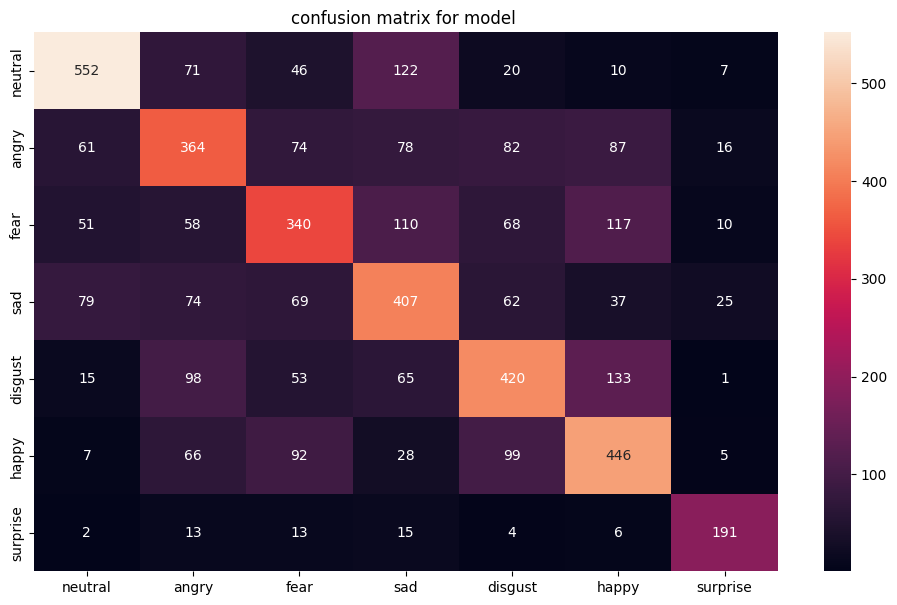

In [ ]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [ ]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     neutral       0.72      0.67      0.69       828
       angry       0.49      0.48      0.48       762
        fear       0.49      0.45      0.47       754
         sad       0.49      0.54      0.52       753
     disgust       0.56      0.54      0.55       785
       happy       0.53      0.60      0.56       743
    surprise       0.75      0.78      0.77       244

    accuracy                           0.56      4869
   macro avg       0.58      0.58      0.58      4869
weighted avg       0.56      0.56      0.56      4869



In [ ]:
model_path = "./res_model.h5"

model.save(model_path)